In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "hive"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 30
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,hive,0,1,0.913580,0.886228,0.899696,0.873616,0.714319,0.974182,0.575758,base
1,hive,0,2,0.801325,0.817568,0.809365,0.700169,0.588128,0.881187,0.423077,base
2,hive,0,3,0.888889,0.834356,0.860759,0.785442,0.671568,0.940536,0.540541,base
3,hive,0,4,0.908537,0.886905,0.897590,0.841797,0.686417,0.960247,0.531250,base
4,hive,0,5,0.848276,0.820000,0.833898,0.761667,0.677643,0.902987,0.560000,base


In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,hive,15,16,0.813333,0.871429,0.841379,0.803571,0.681734,0.898742,0.533333,ecoselekt
1,hive,15,17,0.794118,0.843750,0.818182,0.844510,0.718070,0.904151,0.611111,ecoselekt
2,hive,15,18,0.600000,0.801980,0.686441,0.754625,0.603769,0.748346,0.454545,ecoselekt
3,hive,15,19,0.710345,0.880342,0.786260,0.797137,0.659445,0.842207,0.493976,ecoselekt
4,hive,15,20,0.754967,0.890625,0.817204,0.782335,0.657984,0.853050,0.486111,ecoselekt


In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,hive,15,16,0.835526,0.907143,0.869863,0.869881,0.727438,0.939168,0.583333,best
1,hive,15,17,0.847328,0.867188,0.857143,0.902127,0.791392,0.941343,0.722222,best
2,hive,15,18,0.669355,0.821782,0.737778,0.820882,0.693865,0.832537,0.585859,best
3,hive,15,19,0.739437,0.897436,0.810811,0.870302,0.705248,0.906184,0.554217,best
4,hive,15,20,0.798611,0.898438,0.845588,0.855740,0.732507,0.911989,0.597222,best


(210, 11)


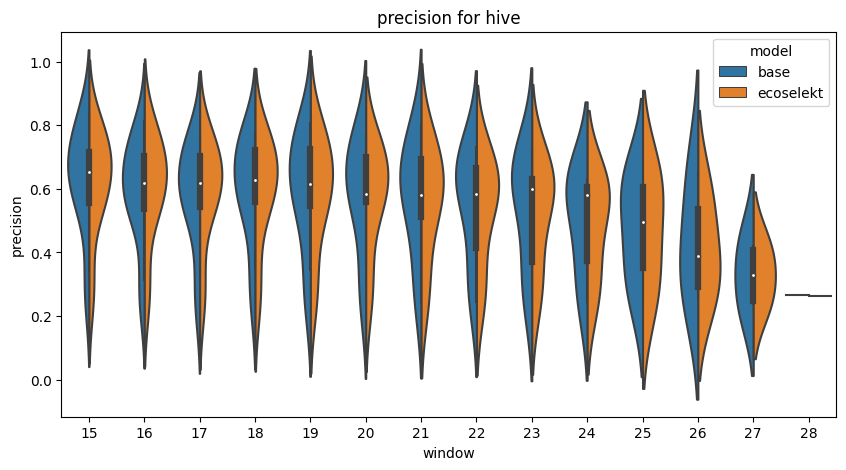

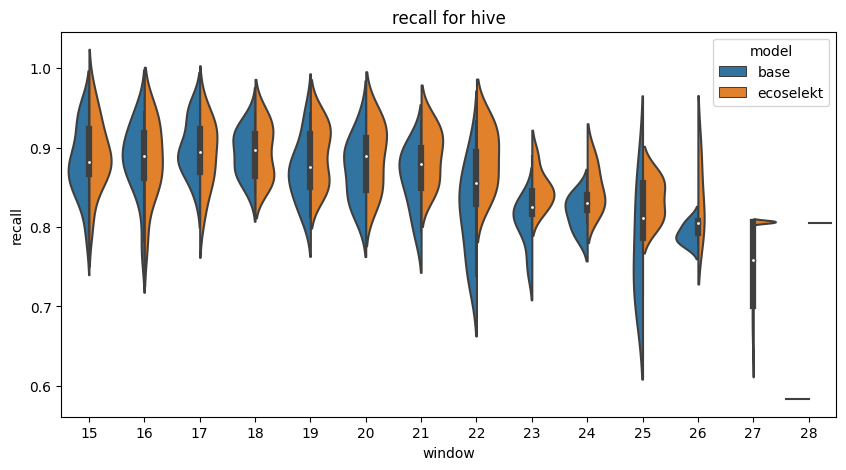

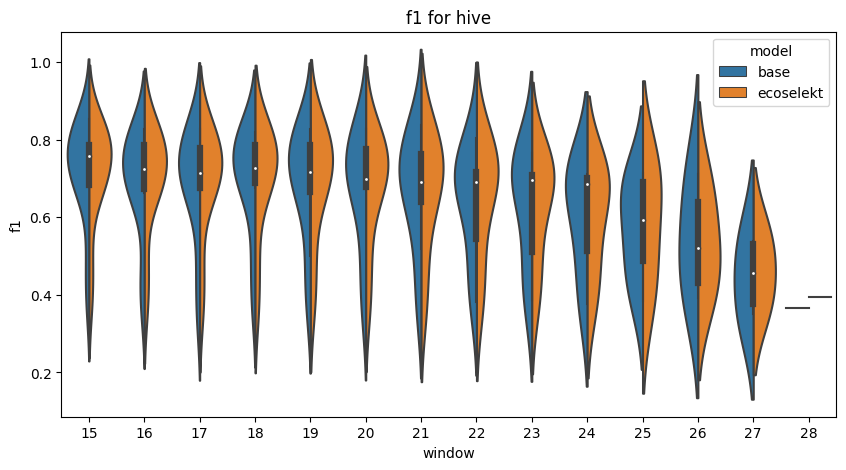

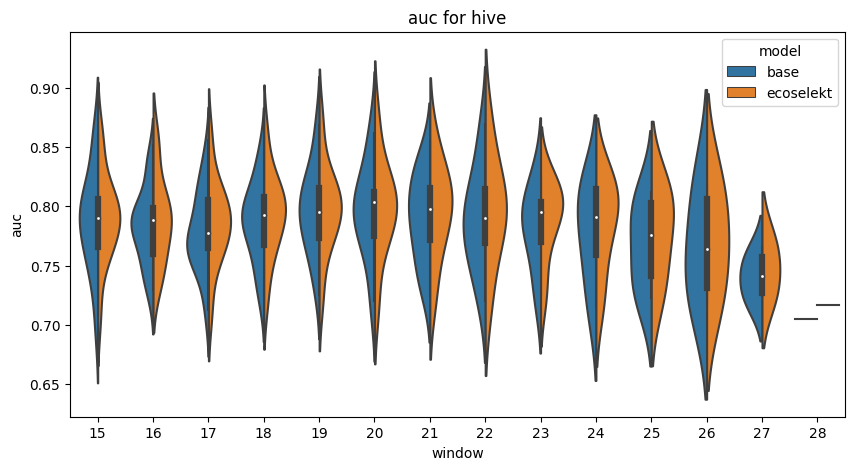

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


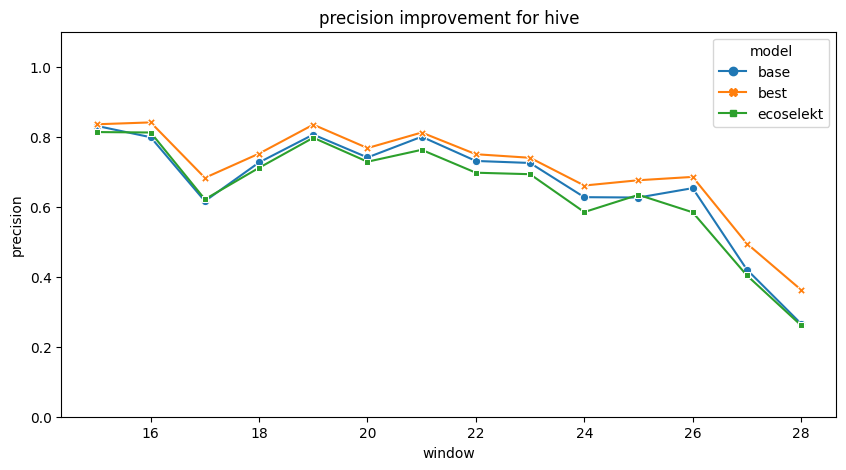

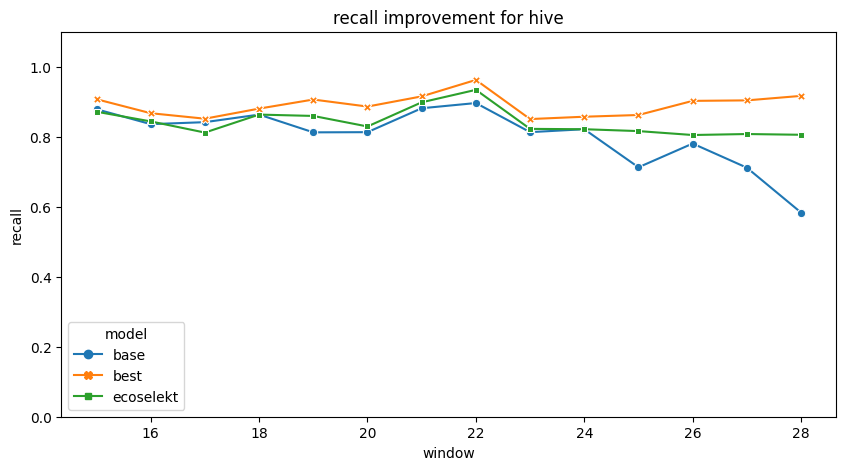

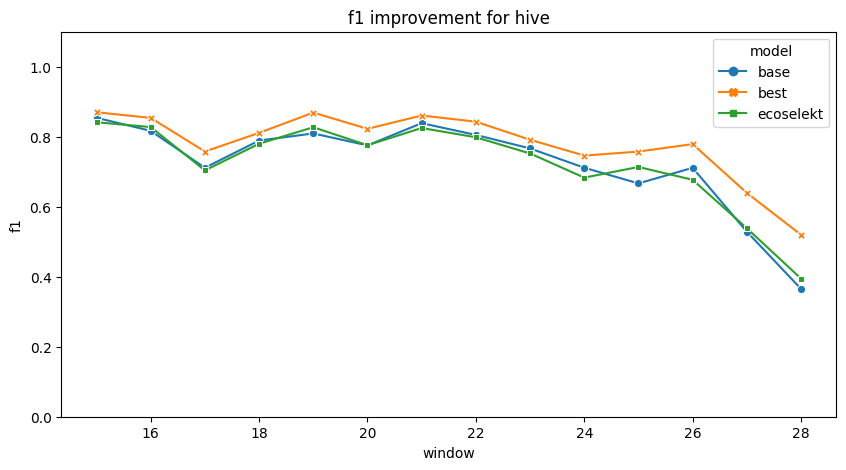

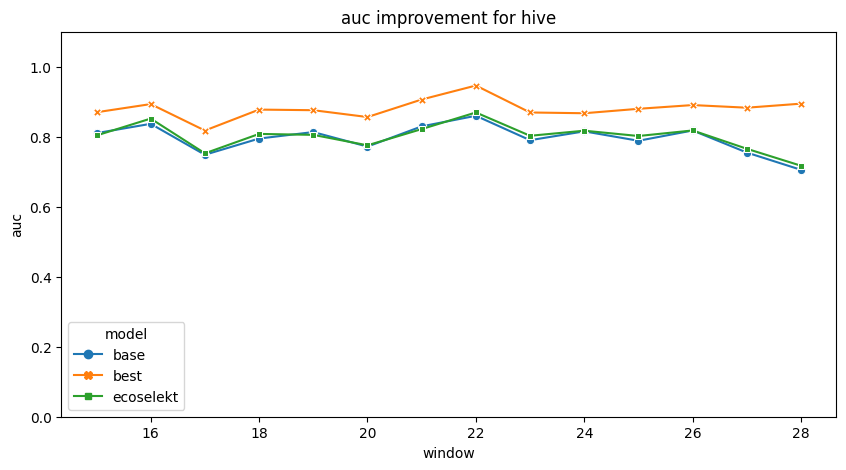

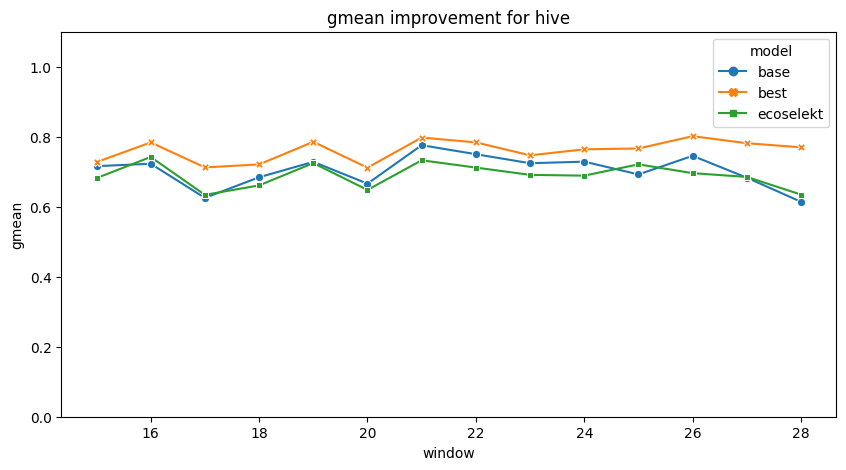

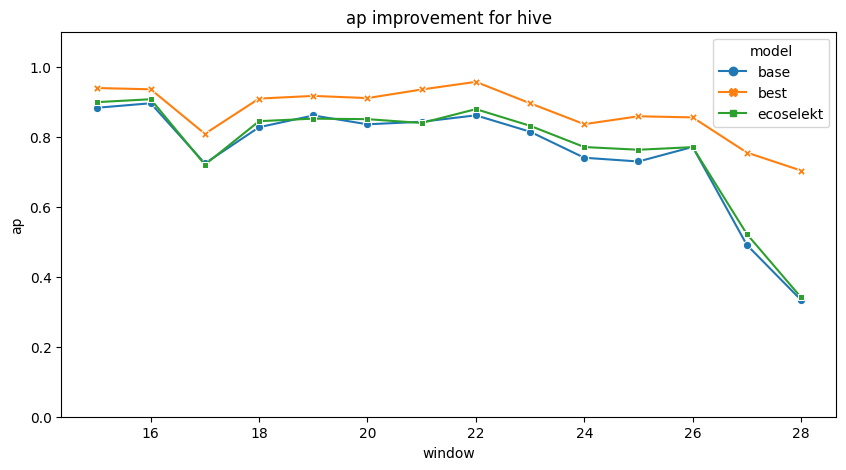

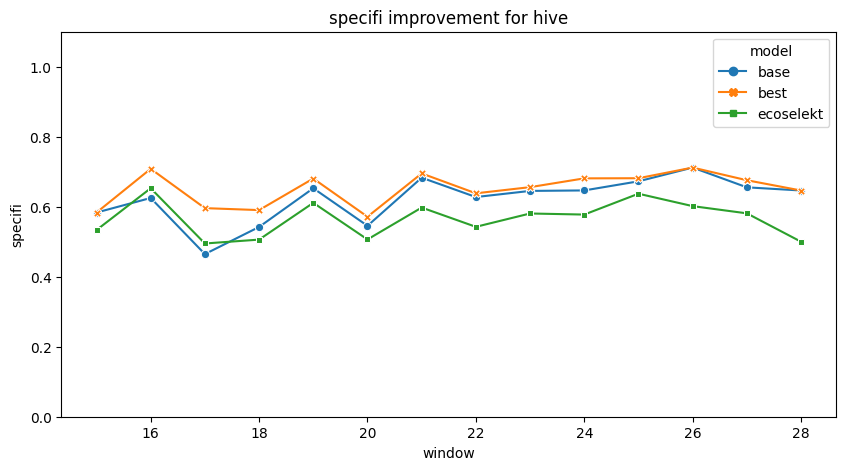

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

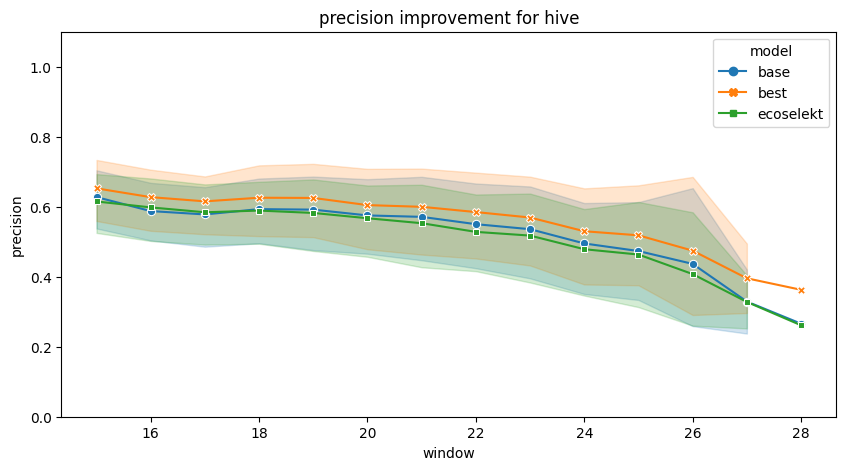

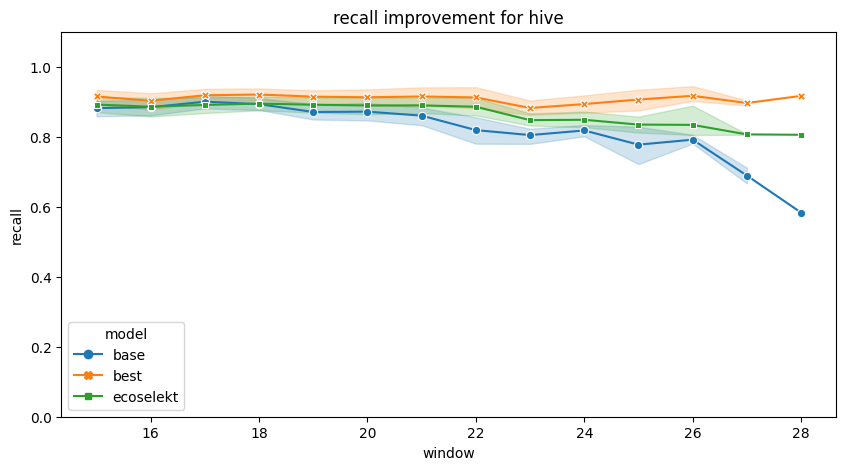

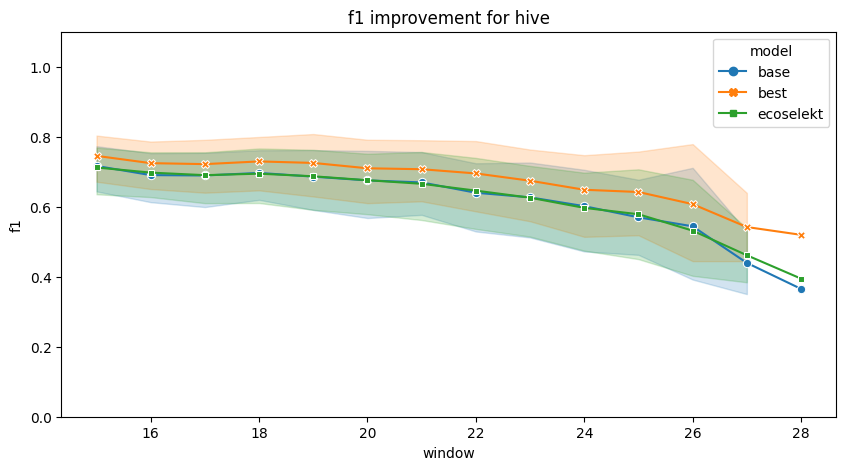

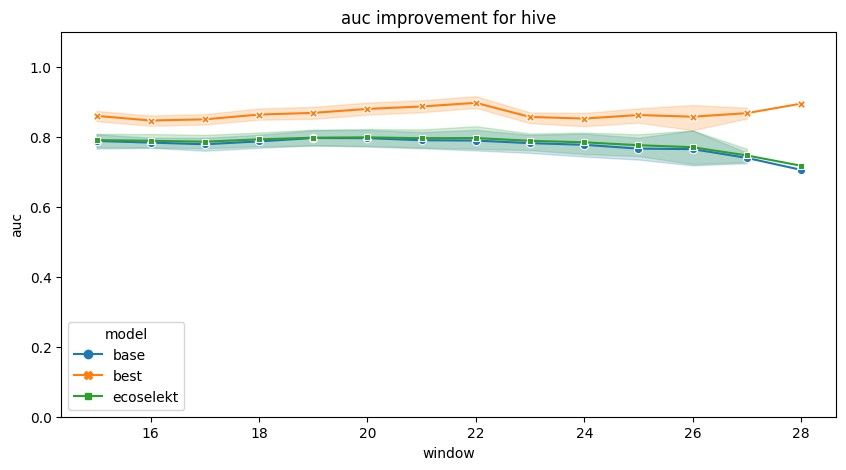

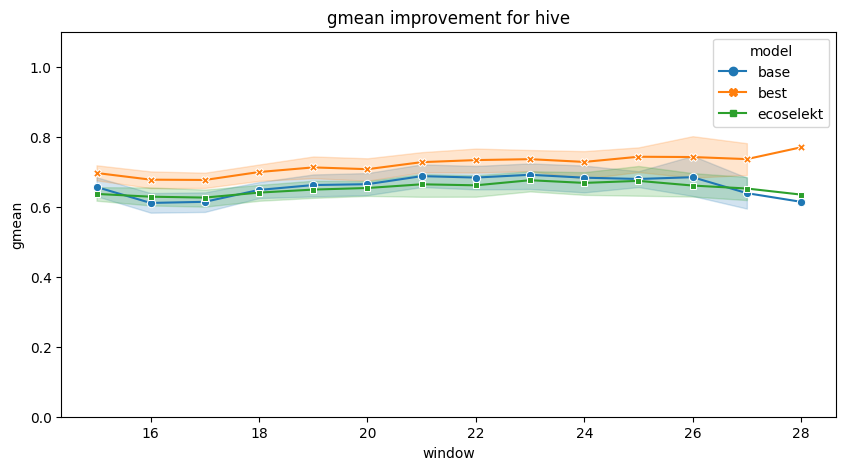

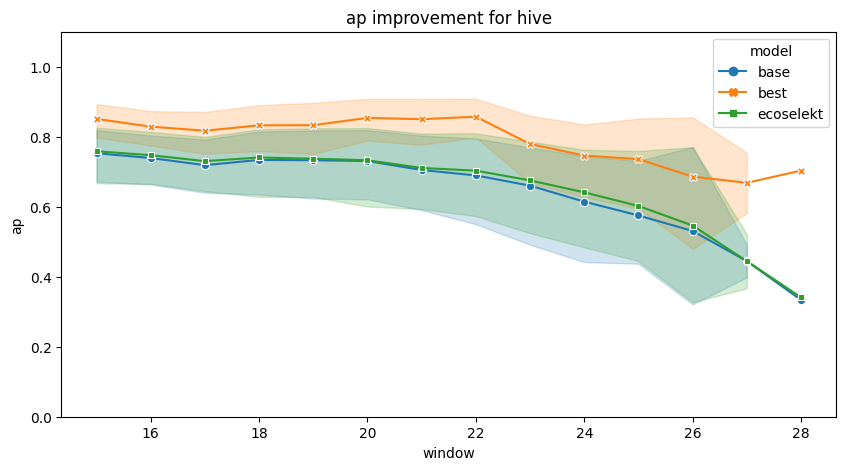

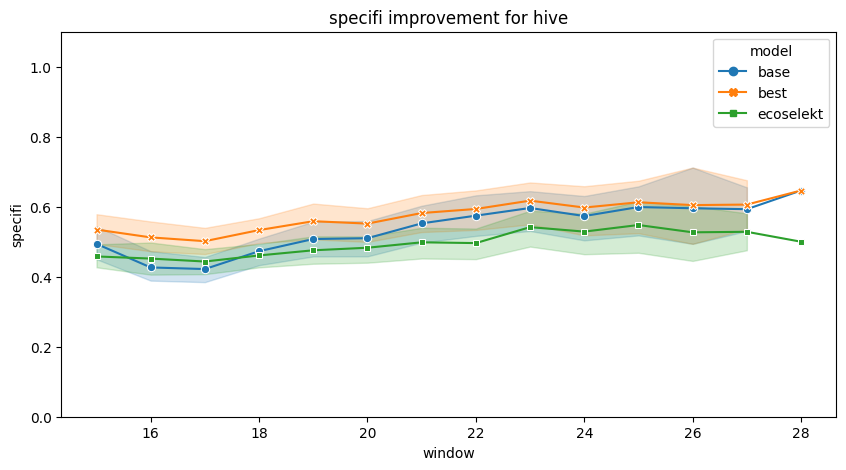

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.029541015625
Wilcoxon test significance: True


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.015022338553107788
Wilcoxon test significance: True


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(21000, 4)


,commit_id,window,test_split,model_version
0,fb230f9df5b7c990c80326671d9975a6f05e1600,15,16,9
1,f272aceaf7da77f9d87f5be42bb1520181035c2c,15,16,9
2,bf834079a3491bdcc65e1b839591f9db7098cf3b,15,16,9
3,868e5e141856ce75af48d854d9e3eb13372d11f4,15,16,15
4,4f9194d1621d7f6574fa03100cf25bc927835ded,15,16,9


In [12]:
selektmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selected_model_per_test_split.csv")
selektmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(selektmodel_df.shape)
selektmodel_df.head()

(21000, 4)


,commit_id,window,test_split,model_version
0,010157e9ab16601b72431ad68efb763ea11c170c,15,16,15
1,01fd68443d41a95362920c5a526d13e41b7684c8,15,16,15
2,03ee0481a518585a4a92875d88c560ff525d75d4,15,16,15
3,09b00fc863d19cf513fe1d188bb671f370f64c2d,15,16,15
4,0a5bc94c1cf65d66f793474a4818021f29e05c7e,15,16,9


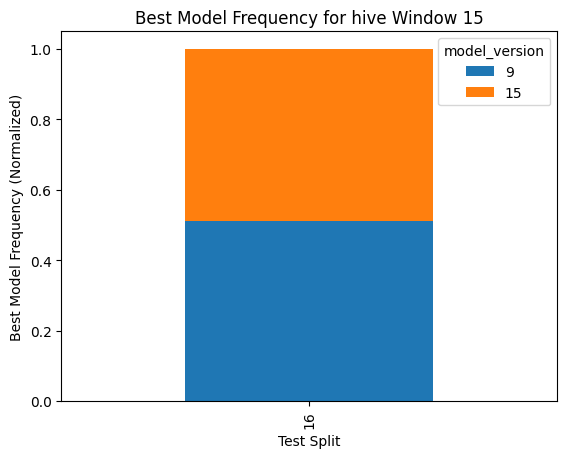

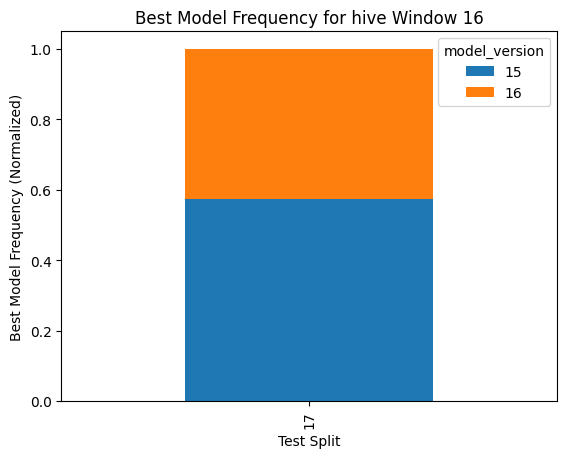

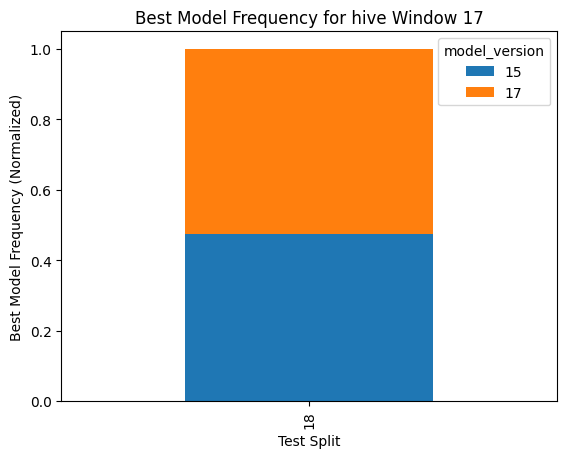

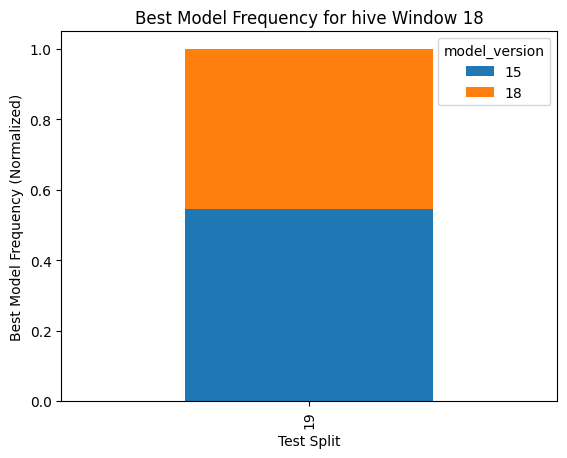

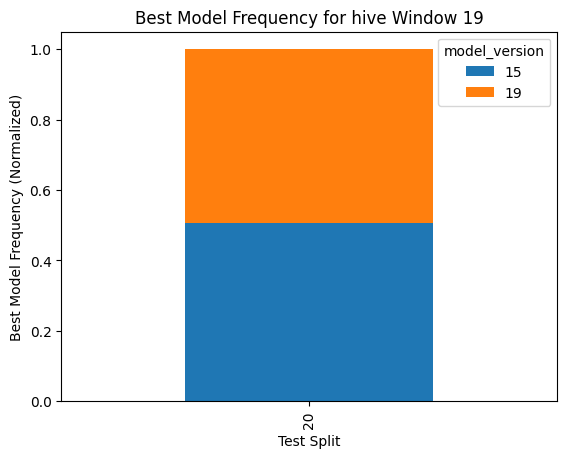

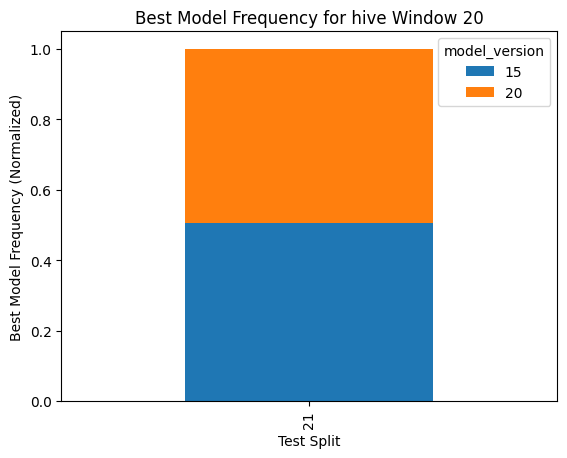

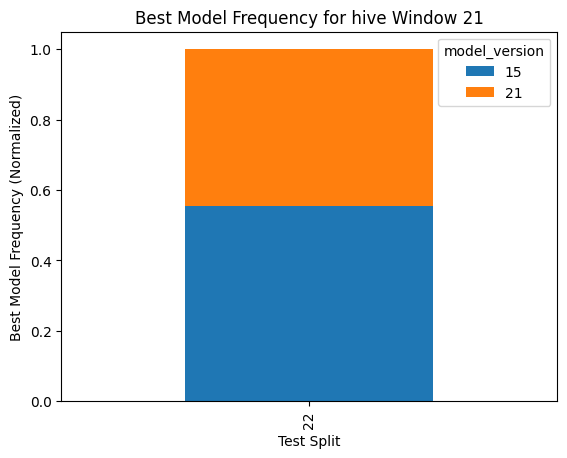

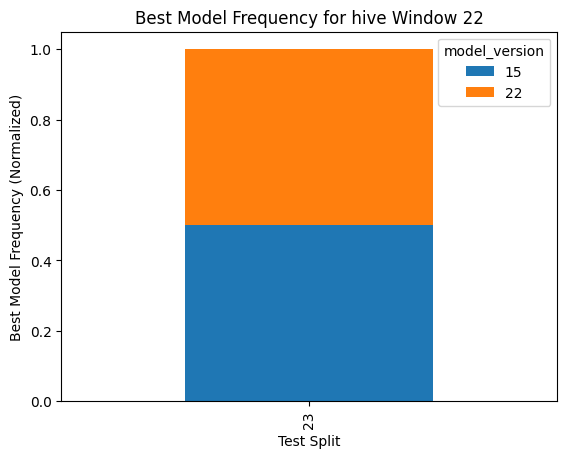

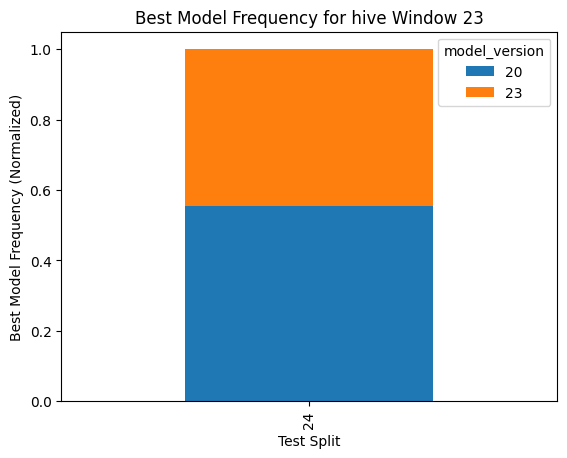

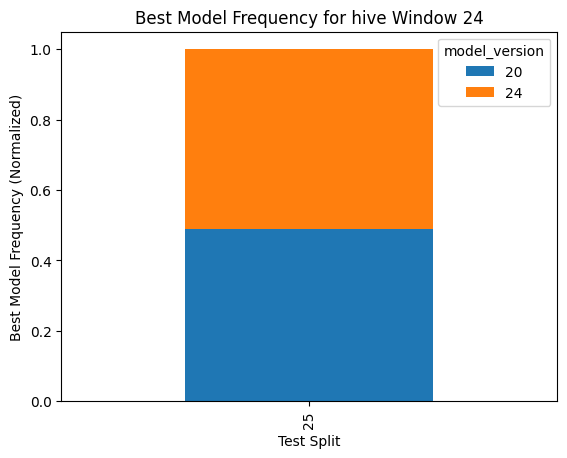

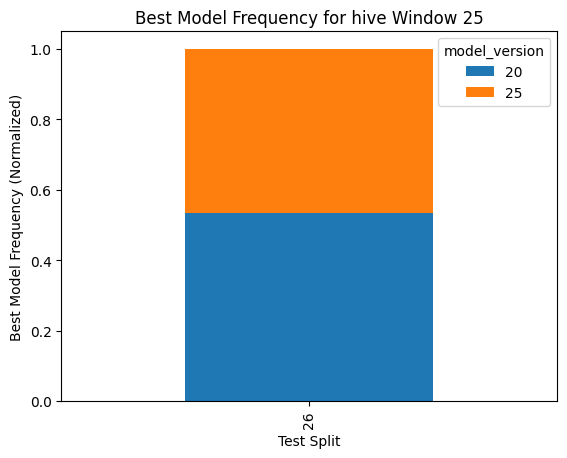

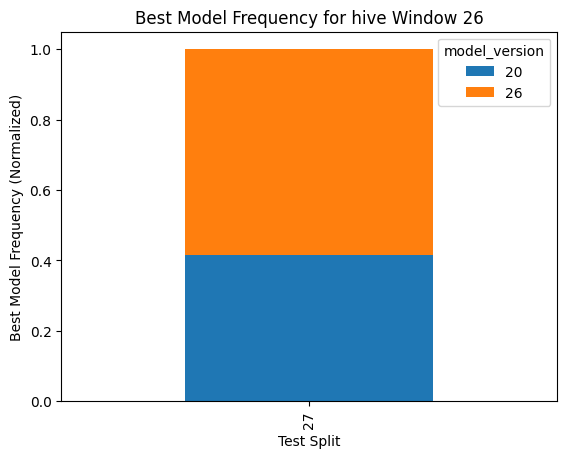

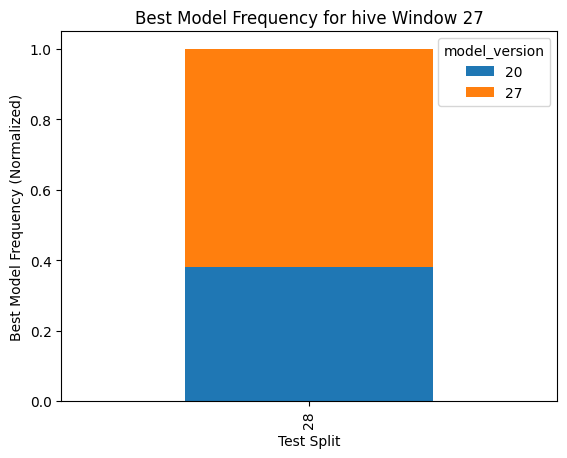

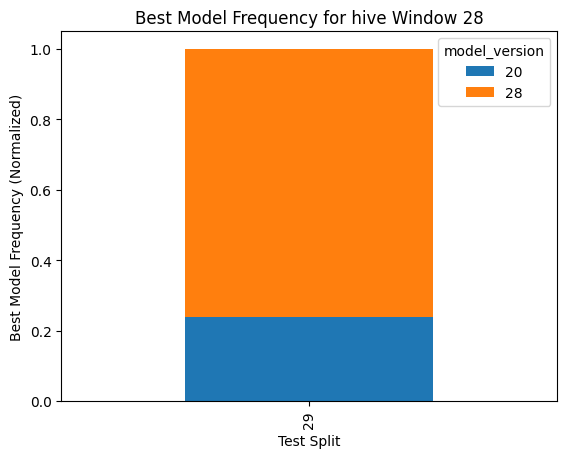

In [13]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")